<img src="https://pages.cnpem.br/capsuladaciencia/wp-content/uploads/sites/155/2022/10/Ilum.png" alt="Ilum - Escola de Ciência" width="200"/>

**Redes Neurais e Algoritmos Genéticos 2025**

**Prof. Dr. Daniel R. Cassar**

Rafael Dalacorte Erdmann (24017)

## Fera Formidável 10: O caixeiro que prefere cidades ímpares

**Objetivo:** Encontre o caminho de menor distância no problema do caixeiro viajante que prefere cidades ímpares e mostre ele de forma gráfica.

**Considerações do experimento:** Considere um número n ≥ 7 de coordenadas (x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez. Além disso, atribua um número inteiro para cada uma das n cidades que o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade inicial.

### Introdução

Nesta Fera, devemos resolver um problema do caixeiro viajante (ou *traveling salesman problem*, TSP) [1], definido pela analogia de um caixeiro que precisa visitar seus clientes em várias cidades e por fim retornar à sua cidade de origem, para isso, ele precisa pensar em qual é a melhor rota a se fazer de modo que nunca retorne a uma cidade previamente visitada e percorra a menor distância possível. No caso em que devemos trabalhar aqui, há ainda uma restrição a mais: o caixeiro primeiro visita todas as cidades de número ímpar.

Calcular todas as rotas possíveis e medir a distância de cada é uma tarefa computacionalmente difícil, especialmente quando há muitas cidades. Por mais que esse seja um problema NP difícil, de modo que todas as rotas *devem ser calculadas* para se garantir que uma rota é a melhor possível, podemos utilizar outras táticas, como algoritmos genéticos, para encontrar uma resposta boa com rapidez.

### Resolução

Começamos importando as funções que serão utilizadas:

In [1]:
from pprint import pprint
from functools import partial
from itertools import permutations
from random import seed
from funcoes_feras import plota_cidades
from funcoes_feras import plota_trajeto

from funcoes_feras import cria_cidades
from funcoes_feras import populacao_caixeiro_impar as cria_populacao
from funcoes_feras import funcao_objetivo_pop_caixeiro_impar
from funcoes_feras import funcao_objetivo_caixeiro_impar
from funcoes_feras import selecao_torneio_min as funcao_selecao
from funcoes_feras import cruzamento_ordenado as funcao_cruzamento
from funcoes_feras import mutacao_troca as funcao_mutacao

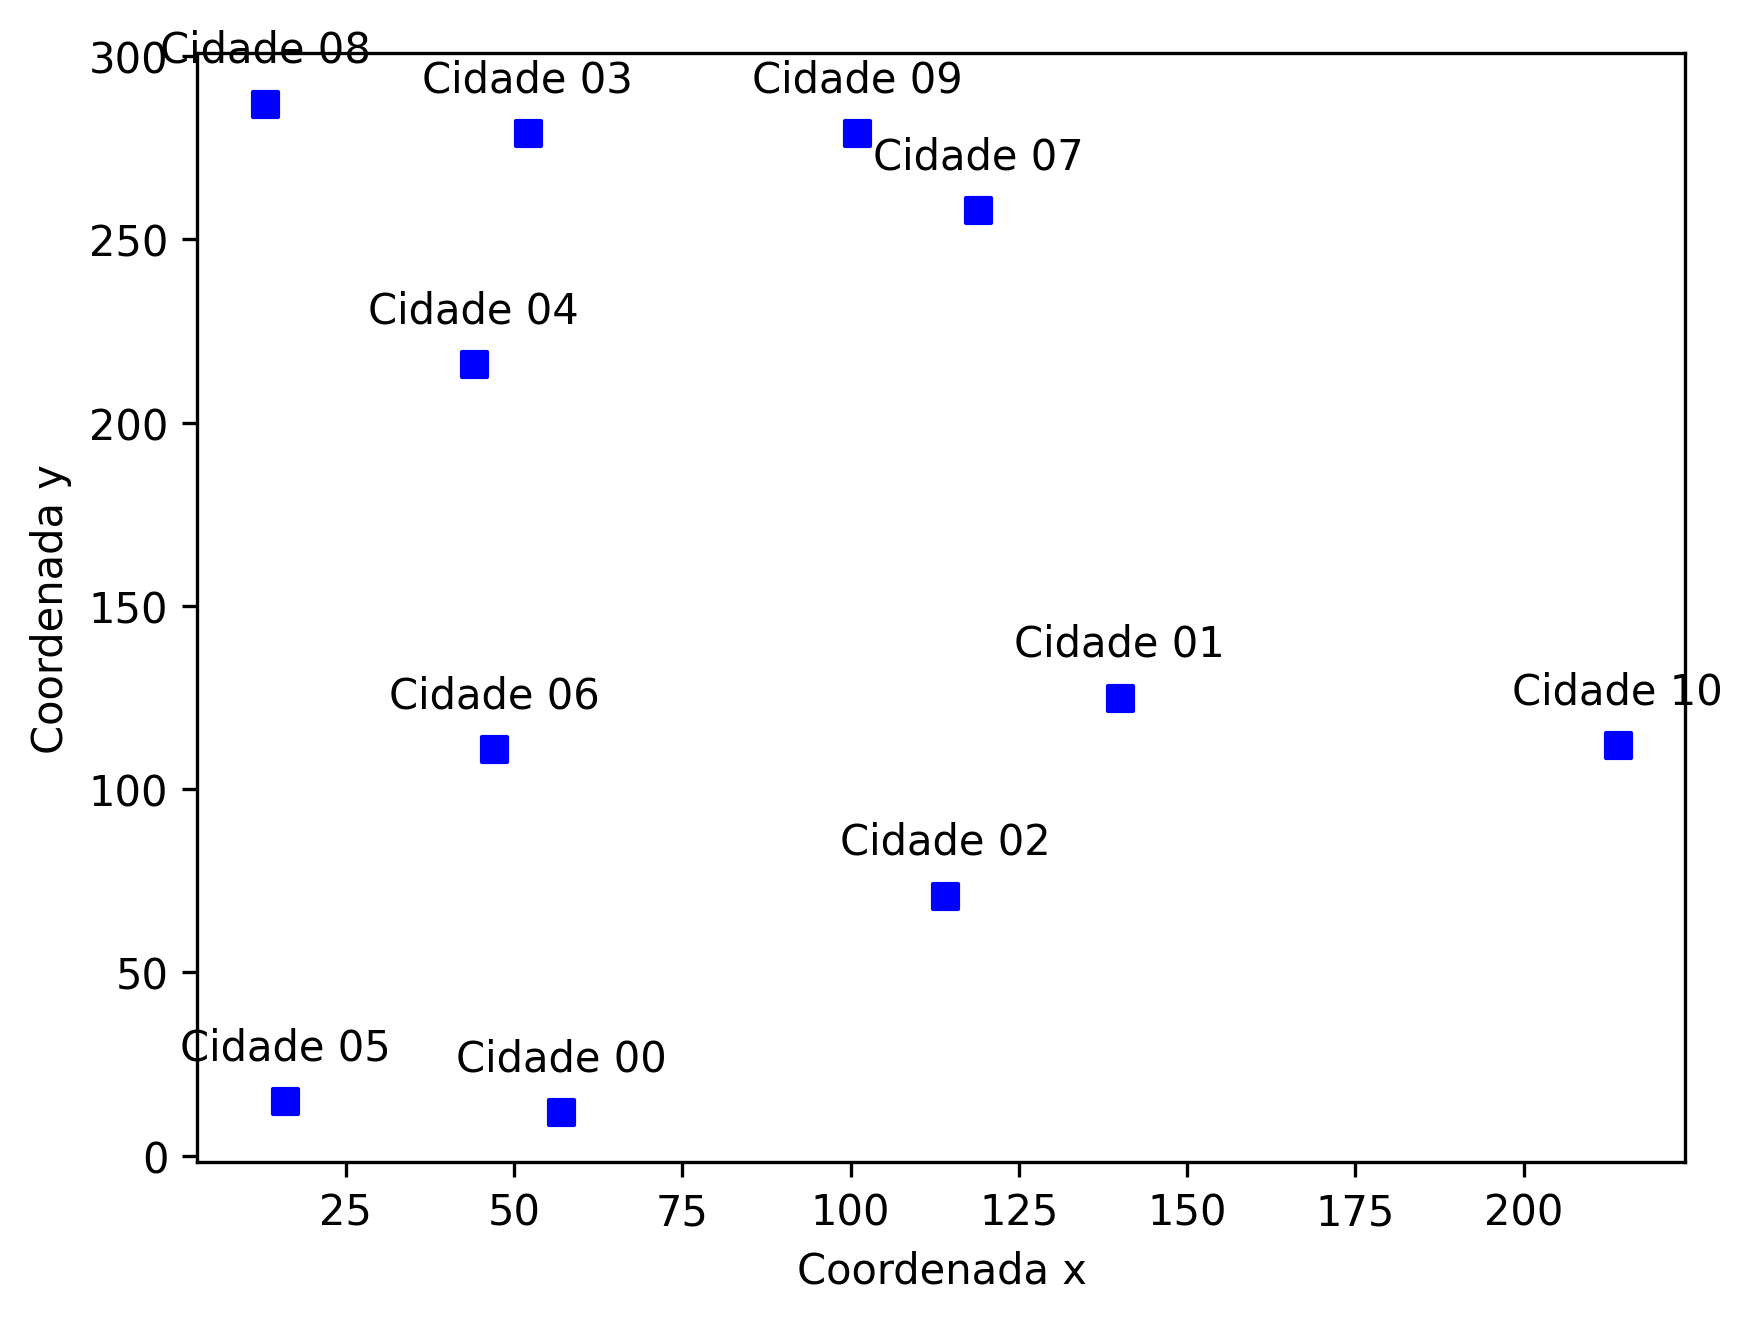

In [2]:
SEMENTE_ALEATORIA = 42
seed(SEMENTE_ALEATORIA)

NUM_CIDADES = 11
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 100
NUM_GERACOES = 700
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 5

plota_cidades(CIDADES)

Para seguir as considerações do experimento, primeiro foi necessário editar a função que gera os candidatos para forçar a cidade zero como cidade inicial e as cidades ímpares como as primeiras visitadas (função `populacao_caixeiro_impar`).

In [3]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro_impar, cidades=CIDADES)

pprint(populacao)

[['Cidade 00',
  'Cidade 07',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 03',
  'Cidade 06',
  'Cidade 10',
  'Cidade 02',
  'Cidade 08',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 01',
  'Cidade 09',
  'Cidade 03',
  'Cidade 07',
  'Cidade 05',
  'Cidade 06',
  'Cidade 10',
  'Cidade 02',
  'Cidade 04',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 01',
  'Cidade 05',
  'Cidade 03',
  'Cidade 09',
  'Cidade 10',
  'Cidade 04',
  'Cidade 06',
  'Cidade 02',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 03',
  'Cidade 05',
  'Cidade 01',
  'Cidade 07',
  'Cidade 09',
  'Cidade 08',
  'Cidade 06',
  'Cidade 04',
  'Cidade 10',
  'Cidade 02'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 09',
  'Cidade 01',
  'Cidade 03',
  'Cidade 07',
  'Cidade 10',
  'Cidade 04',
  'Cidade 06',
  'Cidade 02',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 09',
  'Cidade 03',
  'Cidade 01',
  'Cidade 05',
  'Cidade 02',
  'Cidade 04',
  'Cidade 10',
  'Cidade 08',
  'Cidade 06'],
 ['C

Isso, porém, não resolve sozinho o problema, pois os cruzamentos e mutações ainda alteram a população gerando candidatos inválidos. Caso o problema for ser resolvido com muitas cidades, necessitando de muitas iterações ou grandes populações, uma maneira de garantir uma convergência adequada seria alterando estes operadores.

Neste caso, não foi necessário realizar essas alterações de restrição dos operadores, pois apenas alterando a função objetivo já somos capazes de informar ao algoritmo que candidatos inválidos (com cidade inicial diferente da cidade zero e com cidades ímpares aparecendo após cidades pares) não devem ser selecionados. Com esse intuito, preparei as funções `funcao_objetivo_caixeiro_impar` e `funcao_objetivo_pop_caixeiro_impar` de maneira que a distância para indivíduos inválidos seja infinita, forçando-os a perder na seleção de torneio para qualquer outro candidato válido.

In [4]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 00', 'Cidade 05', 'Cidade 01', 'Cidade 07', 'Cidade 09', 'Cidade 03', 'Cidade 08', 'Cidade 04', 'Cidade 06', 'Cidade 10', 'Cidade 02'] com distância: 997.6205212940652



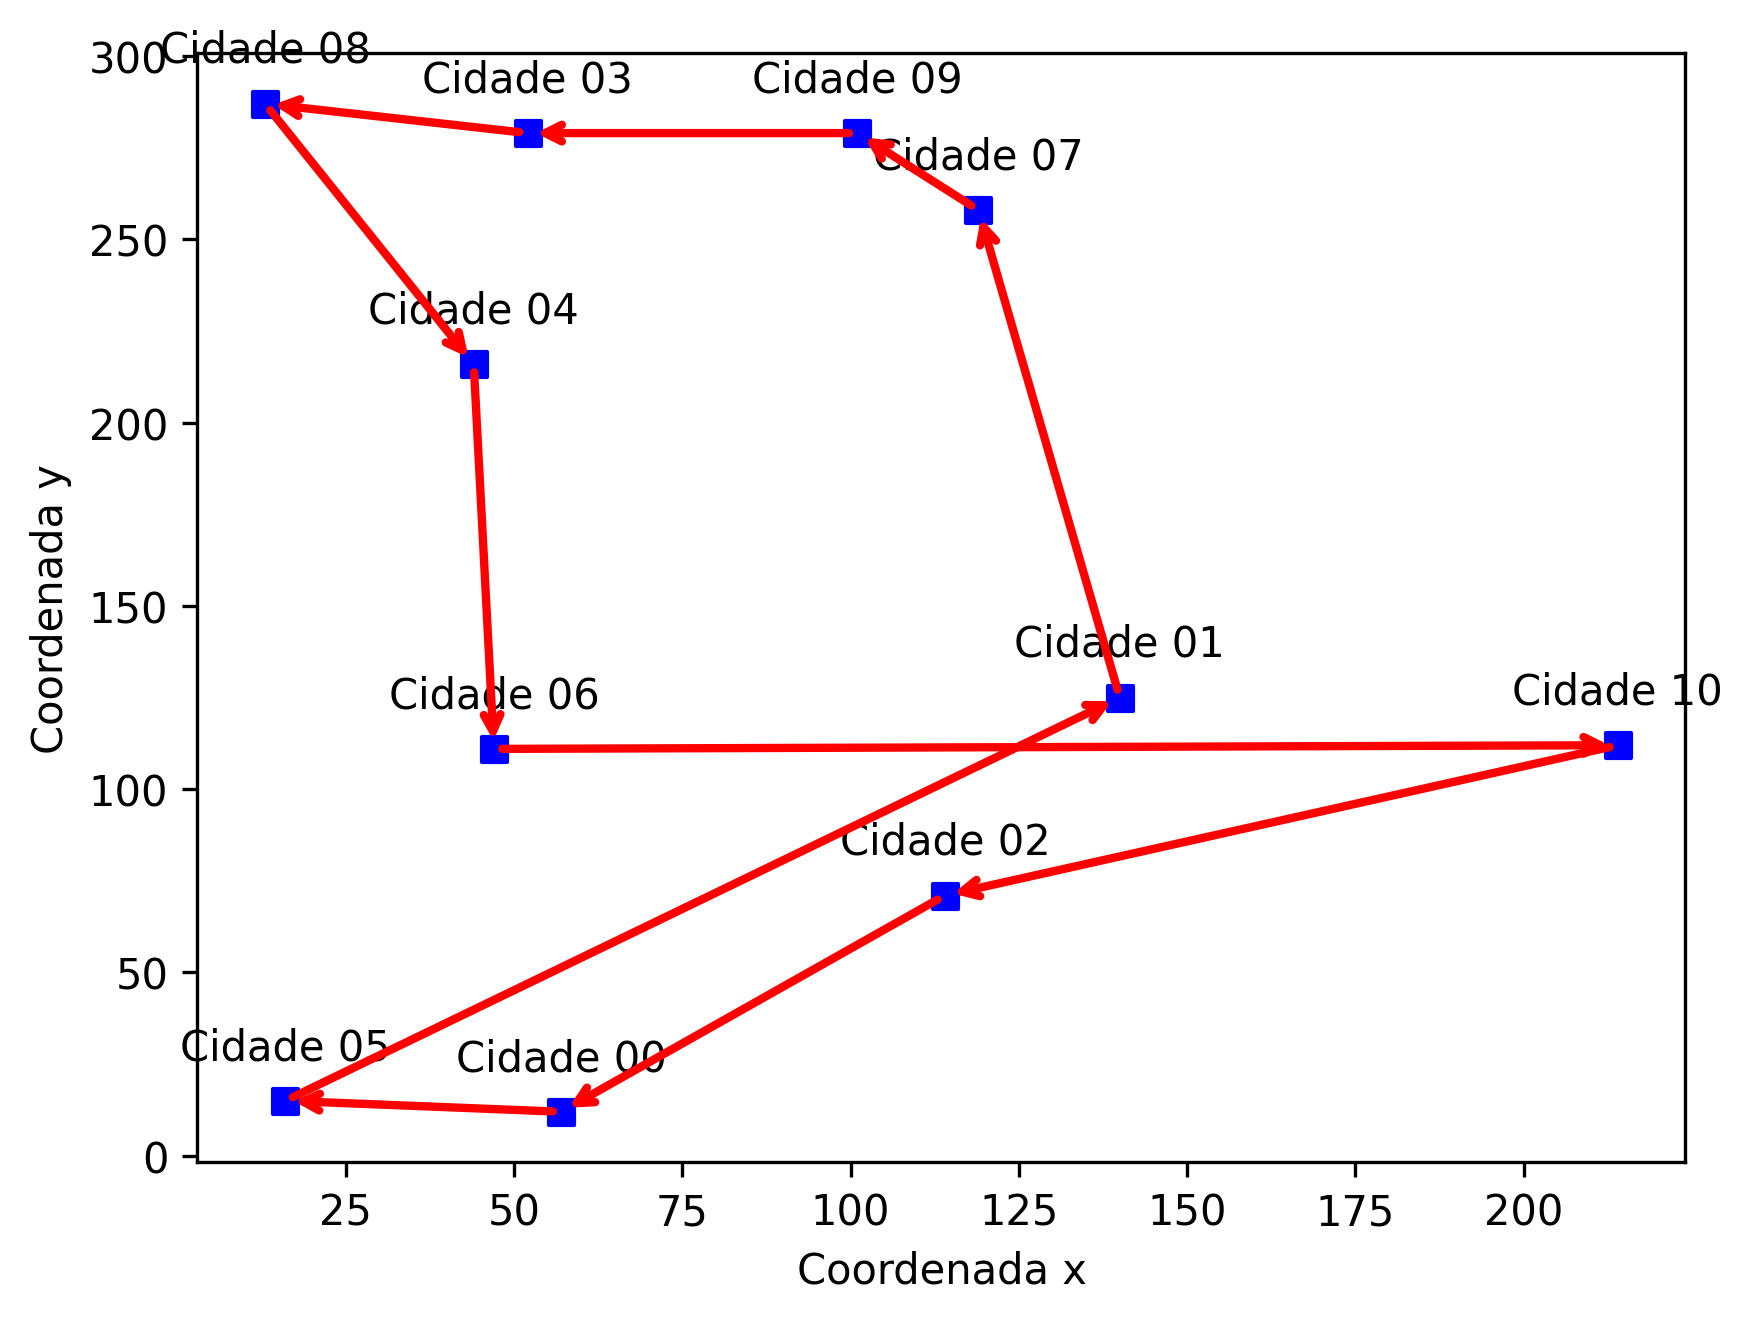

In [5]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro_impar(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)


Melhor individuo obtido por busca exaustiva:
('Cidade 00', 'Cidade 05', 'Cidade 01', 'Cidade 07', 'Cidade 09', 'Cidade 03', 'Cidade 08', 'Cidade 04', 'Cidade 06', 'Cidade 10', 'Cidade 02') com distância: 997.6205212940652



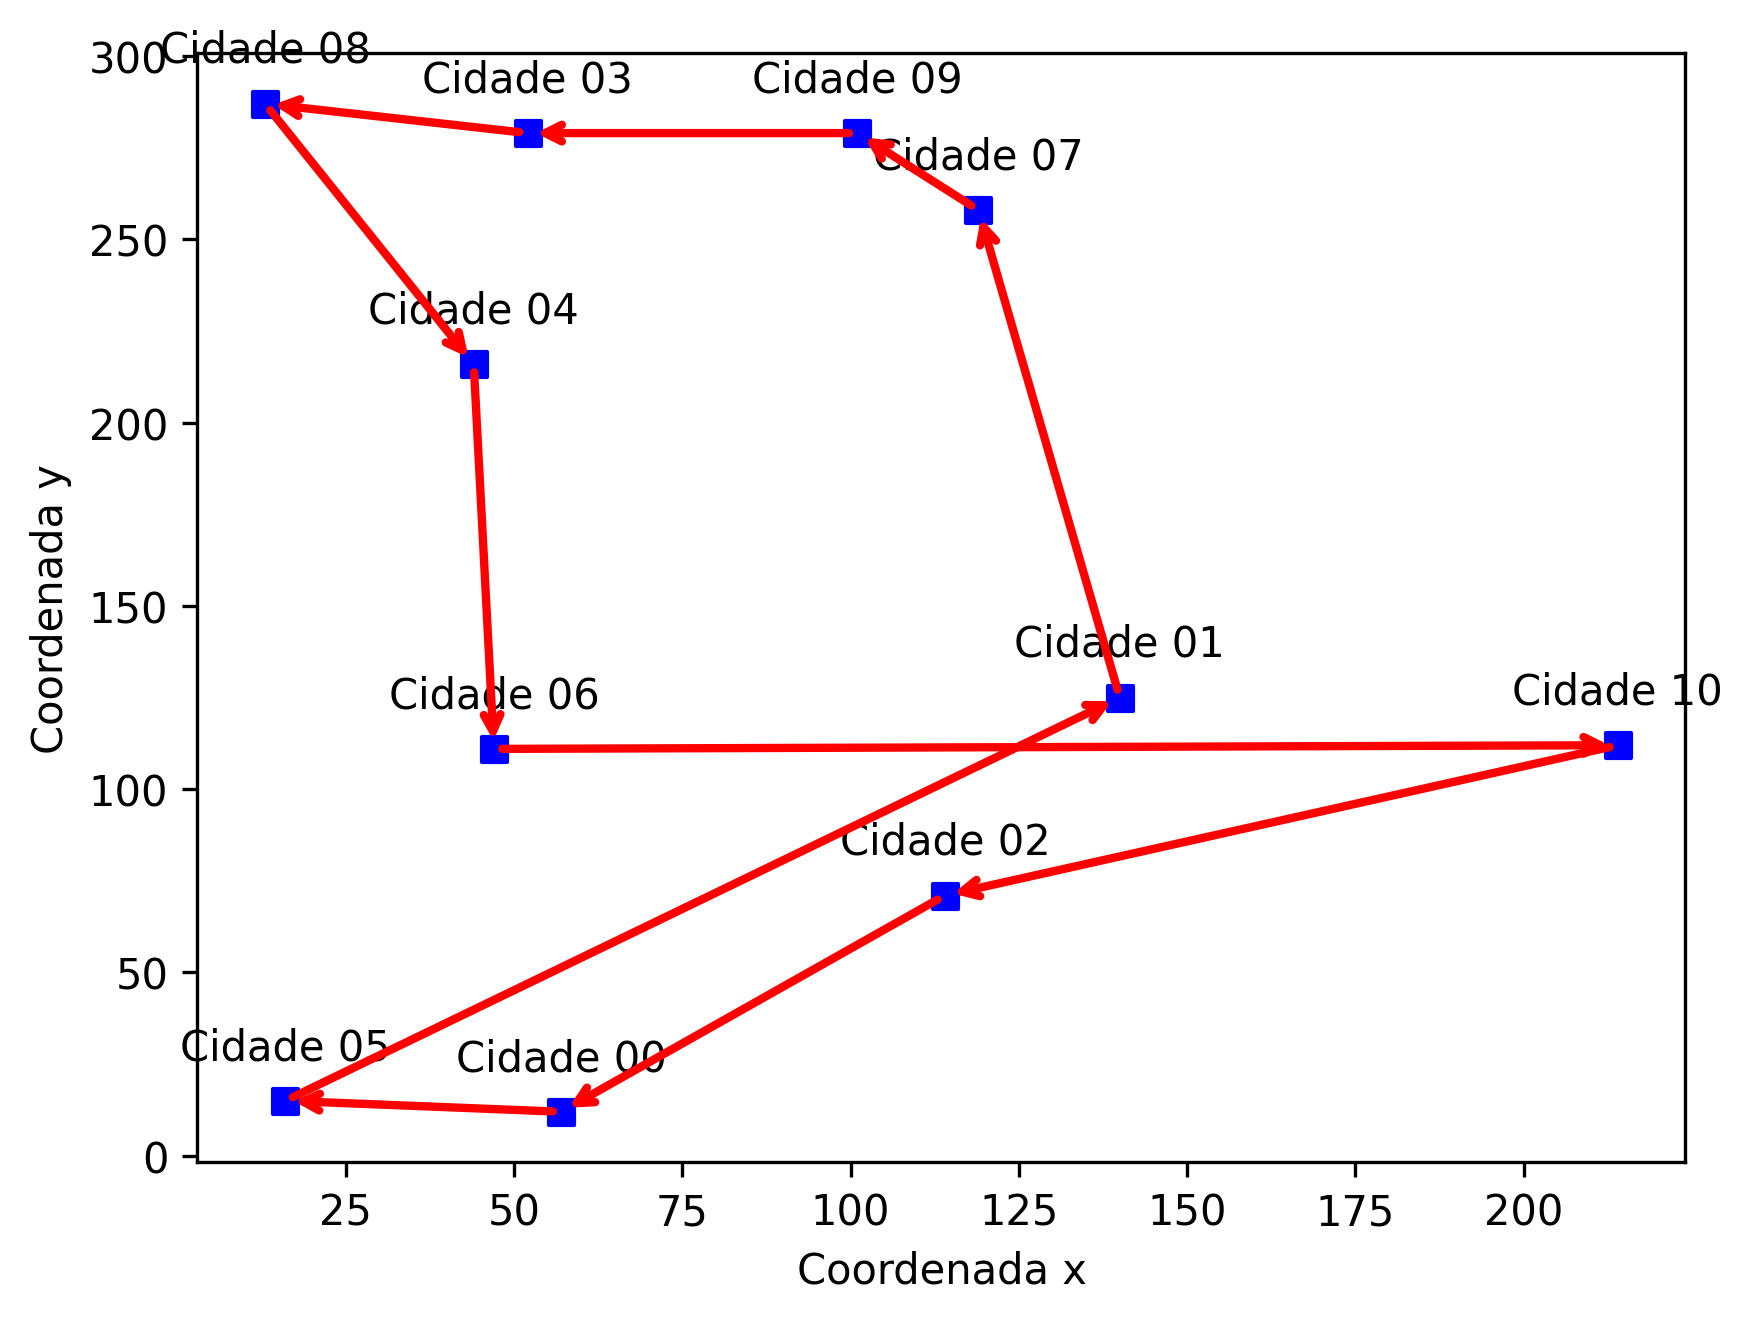

In [6]:
if NUM_CIDADES <= 11:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho in permutations(list(CIDADES.keys())):
        distancia = funcao_objetivo_caixeiro_impar(caminho, CIDADES)
        if distancia < fitness_otimo:
            fitness_otimo = distancia
            resposta_otima = caminho
            melhor_distancia = distancia

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_trajeto(CIDADES, resposta_otima)

Para esse número de cidades, já é formidável a vantagem do algoritmo genético: enquanto ele rodou em ~$1$ segundo, a busca exaustiva rodou em ~$35$ segundos. Com ainda mais cidades, essa diferença se torna ainda maior, pois as permutações da busca exaustiva crescem exponencialmente.

### Conclusão

Apenas com a alteração da função objetivo, observou-se que o algoritmo genético foi capaz de encontrar uma resposta adequada para o problema, sem a necessidade de alterar os operadores de cruzamento, mutação ou seleção. Para problemas mais robustos, porém, isso pode não ser o suficiente para garantir a velocidade e exatidão do modelo.

### Referências

[1] EYAL WIRSANSKY. Hands-On Genetic Algorithms with Python: Applying genetic algorithms to solve real-world deep learning and artificial intelligence problems, 2020. Chapter 4: Combinatorial Optimization, Solving the TSP.